In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/income_data.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  target          32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


## Testing basic assumptions

<AxesSubplot:xlabel='age', ylabel='education-num'>

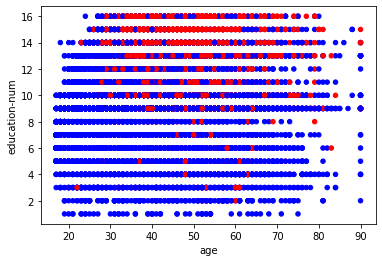

In [6]:
df.plot.scatter('age', 'education-num', c=['r' if t == 1 else 'b' for t in df.target])

In [7]:
# balance in the target
df['target'].mean()

0.2408095574460244

<AxesSubplot:ylabel='Frequency'>

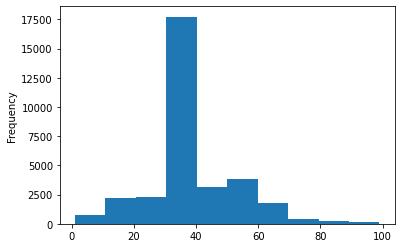

In [8]:
df['hours-per-week'].plot.hist()

In [9]:
df[df['hours-per-week'] < 40]['target'].mean()

0.09506634033234575

In [10]:
df[df['hours-per-week'] == 40]['target'].mean()

0.2133797726227246

In [11]:
df[df['hours-per-week'] > 40]['target'].mean()

0.4024632084333577

In [13]:
pd.cut(df['hours-per-week'], [0, 39, 40, 100])

0        (39, 40]
1         (0, 39]
2        (39, 40]
3        (39, 40]
4        (39, 40]
           ...   
32556     (0, 39]
32557    (39, 40]
32558    (39, 40]
32559     (0, 39]
32560    (39, 40]
Name: hours-per-week, Length: 32561, dtype: category
Categories (3, interval[int64, right]): [(0, 39] < (39, 40] < (40, 100]]

In [14]:
df.groupby(pd.cut(df['hours-per-week'], [0, 39, 40, 100]))['target'].mean()

hours-per-week
(0, 39]      0.095066
(39, 40]     0.213380
(40, 100]    0.402463
Name: target, dtype: float64

<AxesSubplot:ylabel='Frequency'>

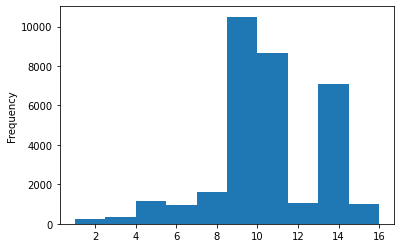

In [15]:
df['education-num'].plot.hist()

In [16]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [19]:
df.groupby('education')['target'].mean().sort_values()

education
 Preschool       0.000000
 1st-4th         0.035714
 5th-6th         0.048048
 11th            0.051064
 9th             0.052529
 7th-8th         0.061920
 10th            0.066452
 12th            0.076212
 HS-grad         0.159509
 Some-college    0.190235
 Assoc-acdm      0.248360
 Assoc-voc       0.261216
 Bachelors       0.414753
 Masters         0.556587
 Prof-school     0.734375
 Doctorate       0.740920
Name: target, dtype: float64

<AxesSubplot:xlabel='education'>

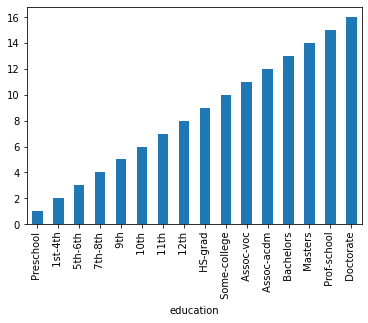

In [21]:
df.groupby('education')['education-num'].mean().sort_values().plot.bar()

<AxesSubplot:xlabel='education'>

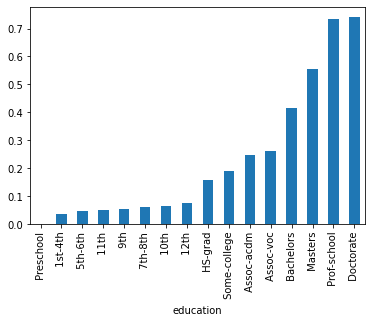

In [22]:
df.groupby('education')['target'].mean().sort_values().plot.bar()

In [24]:
# data scaling for e.g. KNN
(df['age'] - df['age'].mean())/df['age'].std()

0        0.030670
1        0.837096
2       -0.042641
3        1.057031
4       -0.775756
           ...   
32556   -0.849067
32557    0.103982
32558    1.423588
32559   -1.215625
32560    0.983719
Name: age, Length: 32561, dtype: float64

# Training a model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
one_hot = pd.get_dummies(df[['sex', 'education']], drop_first=True)

In [32]:
pd.get_dummies(df[['sex']])

,sex_ Female,sex_ Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,0,1


In [30]:
one_hot.columns[one_hot.var() > 0.04]

Index(['sex_ Male', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ HS-grad', 'education_ Masters', 'education_ Some-college'],
      dtype='object')

In [31]:
# just of illustration
one_hot = one_hot[one_hot.columns[one_hot.var() > 0.04]]
one_hot

,sex_ Male,education_ Assoc-voc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Some-college
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,1,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
32556,0,0,0,0,0,0
32557,1,0,0,1,0,0
32558,0,0,0,1,0,0
32559,1,0,0,1,0,0


In [36]:
X = df[['age', 'hours-per-week']].join(one_hot)
y = df['target']

In [35]:
X

,age,hours-per-week,sex_ Male,education_ Assoc-voc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Some-college
0,39,40,1,0,1,0,0,0
1,50,13,1,0,1,0,0,0
2,38,40,1,0,0,1,0,0
3,53,40,1,0,0,0,0,0
4,28,40,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,0,0,0
32557,40,40,1,0,0,1,0,0
32558,58,40,0,0,0,1,0,0
32559,22,20,1,0,0,1,0,0


In [46]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [47]:
model = DecisionTreeClassifier(max_depth=5).fit(Xtrain, ytrain)

In [39]:
model

DecisionTreeClassifier(max_depth=5)

In [48]:
(model.predict(Xtest) == ytest).mean()

0.7945542020677654

In [42]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_reg = LogisticRegression(max_iter=10_000).fit(Xtrain, ytrain)

In [52]:
metrics.accuracy_score(ytest, log_reg.predict(Xtest))

0.7847271982802744

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


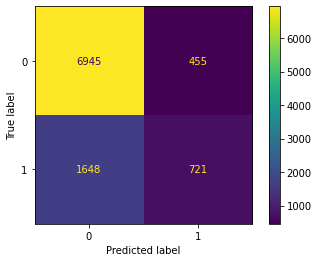

In [53]:
metrics.plot_confusion_matrix(log_reg, Xtest, ytest)

In [54]:
log_reg.predict_proba(Xtest)

array([[0.84129553, 0.15870447],
       [0.77353286, 0.22646714],
       [0.81860964, 0.18139036],
       ...,
       [0.83872431, 0.16127569],
       [0.9250568 , 0.0749432 ],
       [0.59634435, 0.40365565]])

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


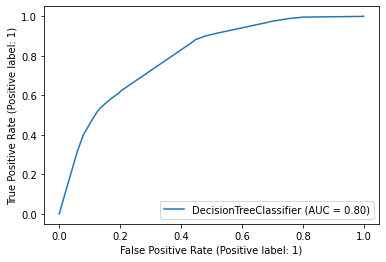

In [55]:
metrics.plot_roc_curve(model, Xtest, ytest)

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


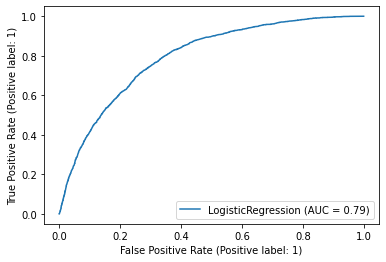

In [56]:
metrics.plot_roc_curve(log_reg, Xtest, ytest)

In [60]:
url = 'https://data.urbansharing.com/oslobysykkel.no/trips/v1/2022/0{n}.csv'

In [61]:
data = pd.concat([
    pd.read_csv(url.format(n=n), parse_dates=[0, 1])
    for n in [4, 5, 6, 7]])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636140 entries, 0 to 159260
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   started_at                 636140 non-null  datetime64[ns, UTC]
 1   ended_at                   636140 non-null  datetime64[ns, UTC]
 2   duration                   636140 non-null  int64              
 3   start_station_id           636140 non-null  int64              
 4   start_station_name         636140 non-null  object             
 5   start_station_description  636124 non-null  object             
 6   start_station_latitude     636140 non-null  float64            
 7   start_station_longitude    636140 non-null  float64            
 8   end_station_id             636140 non-null  int64              
 9   end_station_name           636140 non-null  object             
 10  end_station_description    636124 non-null  object      

In [84]:
data.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2022-04-01 03:02:20.899000+00:00,2022-04-01 03:08:52.080000+00:00,391,442,Vulkan,ved Maridalsveien,59.922510,10.751010,448,Oslo Plaza,ved rundkjøringen,59.912183,10.754434
1,2022-04-01 03:02:33.266000+00:00,2022-04-01 03:06:07.434000+00:00,214,578,Hallings gate,langs Dalsbergstien,59.922777,10.738655,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058
2,2022-04-01 03:03:33.434000+00:00,2022-04-01 03:39:15.050000+00:00,2141,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330,569,Botanisk hage sør-vest,ved Sars' gate,59.917835,10.766374
3,2022-04-01 03:30:25.931000+00:00,2022-04-01 03:35:21.173000+00:00,295,521,Jess Carlsens gate,ved Hausmanns gate,59.918636,10.752394,523,Tøyenbekken,ved Rubina Ranas gate,59.911594,10.761774
4,2022-04-01 03:43:50.046000+00:00,2022-04-01 04:03:11.445000+00:00,1161,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330


<AxesSubplot:ylabel='Frequency'>

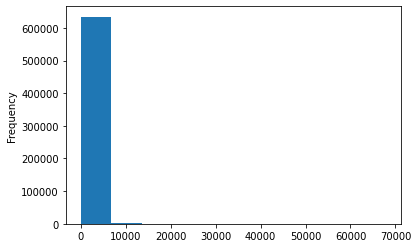

In [63]:
data['duration'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

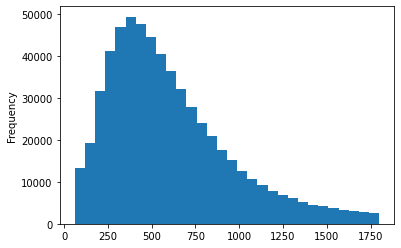

In [65]:
data['duration'][data['duration'] < 60*30].plot.hist(bins=30)

In [79]:
score = (data['duration'] - data['duration'].mean()) / data['duration'].std()

<AxesSubplot:ylabel='Frequency'>

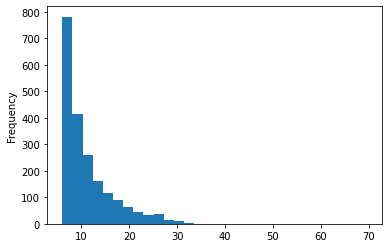

In [83]:
score[score > 6].plot.hist(bins=30)